## Contour finding demo

You can use this code to "vectorize" images, that is to extract polygons that you can then draw with a plotter

In [1]:
from py5canvas import *
import cv2

Load an image

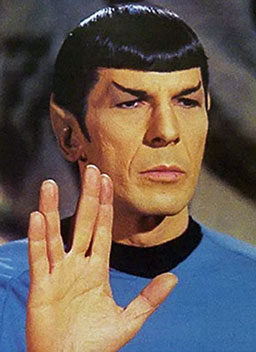

In [2]:
img = load_image('spock.jpg')
img

The following `find_contours` function will return a list of 2d numpy arrays representing polygons. The list can be passed to the Py5canvas `shape` function, or iterated passing each polygon to the `polyline`, `polygon` or `curve` functions. The `find_contours` has an optional argument `eps`, which controls the simplification of the contour. This is done with an algorithm called [Ramer-Douglas-Peucker algorithm](https://en.wikipedia.org/wiki/Ramer–Douglas–Peucker_algorithm) (often referred to as "DP simplification"). It reduces the initially dense polygons to ones with a lower number of vertices, which can be used to create smoother curve approximations when combined with the `curve` function.

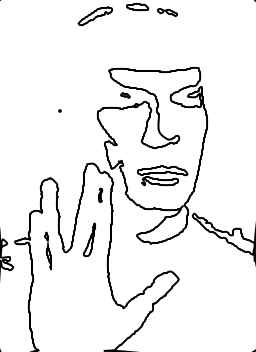

In [8]:
def find_contours(im, invert=False, thresh=127, eps=0.0):
    ''' Utility function to get contours compatible with py5canvas.
    Assumes a grayscale image as a result
    The eps parameter controls the amount of simplification (if > 0)
    '''
    _, thresh_img = cv2.threshold(im, thresh, 256, int(invert))
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    S = []
    for ctr in contours:
        if eps > 0:
            ctr = cv2.approxPolyDP(ctr, eps, True)
        if len(ctr) > 3:
            S.append(np.vstack([ctr[:,0,0], ctr[:,0,1]]).T)
    return S

gray_img = np.array(img.convert('L'))
create_canvas(img.width, img.height)
background(255)
gray_img = cv2.blur(gray_img, (5, 5))
#image(gray_img)

contours = find_contours(gray_img, invert=True, eps=0)
stroke(0)
fill(0,0) # 110)
for poly in contours:
   curve(poly, close=True)
# shape(contours, True)
#print(contours[0])
show()